In [1]:
import os
import shutil
from tqdm import tqdm
import csv
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
datapath = 'Dataset-5'

In [ ]:
# speakers, n = np.load('details.npy',allow_pickle=True)

In [4]:
def get_labels(path):
    labels = os.listdir(path)
    label_indices = np.arange(0, len(labels))
    return labels, len(labels)
speakers, n = get_labels(datapath)

# Saving the names of speakers and their labels
details=[speakers,n]
np.save('details.npy', details)
print('Number of speakers: ',n)

Number of speakers:  5


##### Making Train and Test csv files containing the audio filename and the speaker associated with that audio

In [5]:
def organise_data_csv(path):
    test = [['filename','speaker']]
    train =[['filename','speaker']]
    training_samples = [[] for _ in range(n)]
    for id_ in speakers:
        speaker_path = path+'/'+id_
        videos = os.listdir(speaker_path)
        c=0
        for v in videos:
            files = os.listdir(speaker_path+'/'+v) 
            random.shuffle(files)
            audio_clip = speaker_path+'/'+v+'/'+files.pop(0), path +'/'+id_+'.'+str(c)+'.wav'
            #print(audio_clip,type(audio_clip))
            os.rename(audio_clip[0],audio_clip[1])
            if c==0:
                test.append([audio_clip[1],id_])                
            else:
                train.append([audio_clip[1],id_])
                training_samples[speakers.index(id_)].append([audio_clip[1],speakers.index(id_)])
            c+=1
            shutil.rmtree(speaker_path+'/'+v)
        os.rmdir(path+'/'+id_)
        
        
    with open('train.csv', 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(train)

    csvFile.close()    
    
    with open('test.csv', 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(test)

    csvFile.close()
    
    return training_samples,test
        
training_samples ,testing_samples = organise_data_csv(datapath)

In [6]:
np.save('training_samples.npy', training_samples)
np.save('testing_samples.npy', testing_samples)

In [ ]:
# training_samples = np.load('training_samples.npy', allow_pickle=True).tolist()
# testing_samples = np.load('testing_samples.npy', allow_pickle=True).tolist()

Text(0, 0.5, 'Frequency')

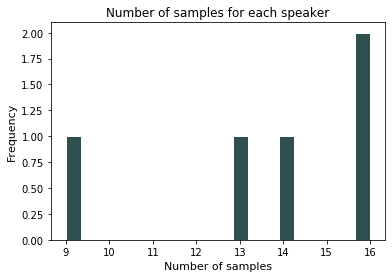

In [7]:
samples_number = [len(i) for i in training_samples]
total_samples = sum(samples_number)
# Draw the plot
plt.hist(samples_number,bins = 20,color = '#2F4F4F', edgecolor = 'w')    
# Title and labels
plt.title('Number of samples for each speaker')
plt.xlabel('Number of samples', size = 11)
plt.ylabel('Frequency', size= 11)